# Classification Trees/Neural Network Project

By Nicholas Fullerton

Dataset 1 : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?resource=download&select=Car+details+v3.csv  
Dataset 2 : https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial (I know in the link it says tutorial, I just took the datset from this notebook. I did not copy this notebook).

## Introduction

In this Project we will be using 2 Machine Learning Algorithms.

1 - We will be using classification trees to distinguish the make of a car given certain features. We will test this using a decision tree and a Random Forest to see which gives the best results.  
2 - We will create a neural network that will classify a picture of a number between 0-9 correctly.

## Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

## Machine Learning Algorithm 1 - Decision Trees

We will first take a look at our data, then drop any rows with NA values.

In [2]:
cars = pd.read_csv("Car_details_v3.csv")
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
cars = cars.dropna()


## Data Manipulation

As You can see from the data set there isn't a column that has the 'make' of the car. So we have to do that ourselves. In the name column it can be seen that the make of the car is the first work in the name, so we will just extract that and make it its own column.

In [4]:
cars['make'] = cars['name'].str.split(" ").str[0]
cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,make
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,Hyundai
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,Hyundai
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,Maruti
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,Tata


In [5]:
cars['make'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [6]:
cars['make'].value_counts()

Maruti           2367
Hyundai          1360
Mahindra          758
Tata              719
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: make, dtype: int64

#### Narrowing Down our Dataset

Here I will be only taking makes of cars that I actually know, and that are highly populated in the dataset. 

In [7]:
car_make = ['Honda', 'Hyundai', 'Toyota', 'Ford', 'Chevrolet', 'BMW', 'Mahindra', 'Volkswagen']
cars = cars[cars.make.isin(car_make)==True]
cars = cars.reset_index()
cars['make'].unique()

array(['Honda', 'Hyundai', 'Toyota', 'Ford', 'Mahindra', 'Chevrolet',
       'Volkswagen', 'BMW'], dtype=object)

<AxesSubplot:>

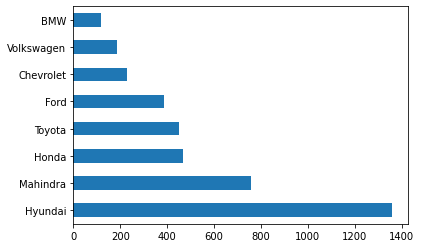

In [8]:
cars['make'].value_counts().plot(kind='barh')

#### More Manipulation

Next I drop certain columns that will not be needed. Also I will drop the torque column as the format is too complicated to manipulate into something usable. 

In [9]:
cars.drop(['seller_type', 'name', 'owner', 'torque','index'],axis=1,inplace=True)
cars

,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,seats,make
0,2006,158000,140000,Petrol,Manual,17.7 kmpl,1497 CC,78 bhp,5.0,Honda
1,2010,225000,127000,Diesel,Manual,23.0 kmpl,1396 CC,90 bhp,5.0,Hyundai
2,2017,440000,45000,Petrol,Manual,20.14 kmpl,1197 CC,81.86 bhp,5.0,Hyundai
3,2011,350000,90000,Diesel,Manual,23.59 kmpl,1364 CC,67.1 bhp,5.0,Toyota
4,2013,200000,169000,Diesel,Manual,20.0 kmpl,1399 CC,68.1 bhp,5.0,Ford
...,...,...,...,...,...,...,...,...,...,...
3952,2013,380000,25000,Petrol,Manual,18.5 kmpl,1197 CC,82.85 bhp,5.0,Hyundai
3953,2008,120000,191000,Petrol,Manual,17.92 kmpl,1086 CC,62.1 bhp,5.0,Hyundai
3954,2014,475000,80000,Diesel,Manual,22.54 kmpl,1396 CC,88.73 bhp,5.0,Hyundai
3955,2013,320000,110000,Petrol,Manual,18.5 kmpl,1197 CC,82.85 bhp,5.0,Hyundai


#### More Manipulation

Below I fix the mileage, engine, and max_power columns and turn them into floats that we can use for our classifier.

In [10]:
cars['mileage'] = cars['mileage'].str.split(" ").str[0]
cars['mileage'] = cars['mileage'].astype(float)
cars['engine'] = cars['engine'].str.split(" ").str[0]
cars['engine'] = cars['engine'].astype(float)
cars['max_power'] = cars['max_power'].str.split(" ").str[0]
cars['max_power'] = cars['max_power'].astype(float)
cars.head()


,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,seats,make
0,2006,158000,140000,Petrol,Manual,17.70,1497.0,78.00,5.0,Honda
1,2010,225000,127000,Diesel,Manual,23.00,1396.0,90.00,5.0,Hyundai
2,2017,440000,45000,Petrol,Manual,20.14,1197.0,81.86,5.0,Hyundai
3,2011,350000,90000,Diesel,Manual,23.59,1364.0,67.10,5.0,Toyota
4,2013,200000,169000,Diesel,Manual,20.00,1399.0,68.10,5.0,Ford


#### More Manipulation

Below I encode the categorical data, so we can use it in our classifier. 

In [11]:
le = LabelEncoder()
cars['fuel'] = le.fit_transform(cars['fuel'])
cars['transmission'] = le.fit_transform(cars['transmission'])
cars

,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,seats,make
0,2006,158000,140000,3,1,17.70,1497.0,78.00,5.0,Honda
1,2010,225000,127000,1,1,23.00,1396.0,90.00,5.0,Hyundai
2,2017,440000,45000,3,1,20.14,1197.0,81.86,5.0,Hyundai
3,2011,350000,90000,1,1,23.59,1364.0,67.10,5.0,Toyota
4,2013,200000,169000,1,1,20.00,1399.0,68.10,5.0,Ford
...,...,...,...,...,...,...,...,...,...,...
3952,2013,380000,25000,3,1,18.50,1197.0,82.85,5.0,Hyundai
3953,2008,120000,191000,3,1,17.92,1086.0,62.10,5.0,Hyundai
3954,2014,475000,80000,1,1,22.54,1396.0,88.73,5.0,Hyundai
3955,2013,320000,110000,3,1,18.50,1197.0,82.85,5.0,Hyundai


## Start of the Algorithm

First we will seperate our parameters and target values.

Next we will use K Fold Cross Validation with 5,10, and 20 folds. We will use Decision Tree Classifier as our model and retrieve the average accuracy for each fold for our model.

In [12]:
params = cars.loc[:,cars.columns != 'make']
target = cars['make']

In [13]:
acc = [0,0,0]
folds = [5, 10, 20]
i = 0
for fold in folds:
    kf = KFold(n_splits=fold)
    
    for train_index, test_index in kf.split(params):
        x_train, x_test = params.iloc[train_index], params.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        clf = tree.DecisionTreeClassifier()
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        acc[i] += accuracy_score(y_test, y_pred)
    acc[i] = acc[i]/fold
    print(f"Accuracy for Decision Tree Classifier with {fold} folds - {round(acc[i]*100,2)}%")
    i+=1



Accuracy for Decision Tree Classifier with 5 folds - 97.83%
Accuracy for Decision Tree Classifier with 10 folds - 97.98%
Accuracy for Decision Tree Classifier with 20 folds - 98.28%


## Tree Classifier Algorithm 2

As shown above, 20 folds produced the best accuracy for our dataset. So for our Cross-Validation of this algorithm we will use 20 fold. For this algorithm we use Random Forest Classifier, and we have 3 different paremeter for our classifier for the number of trees which is 1000, 2000, and the total length of our dataset. 

In [14]:
acc = [0,0,0,0,0]
fold = 20
trees = [1000, 2000, len(params)]
i = 0
for tree in trees:
    kf = KFold(n_splits=fold)
    rfc = RandomForestClassifier(n_estimators=tree)
    for train_index, test_index in kf.split(params):
        x_train, x_test = params.iloc[train_index], params.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        rfc.fit(x_train,y_train)
        y_pred = rfc.predict(x_test)
        acc[i] += accuracy_score(y_test, y_pred)
    acc[i] = acc[i] / fold
    print(f"Accuracy for Random Forest Classifier with {tree} trees - {round(acc[i]*100,2)}%")
    i+=1

Accuracy for Random Forest Classifier with 1000 trees - 99.01%
Accuracy for Random Forest Classifier with 2000 trees - 98.96%
Accuracy for Random Forest Classifier with 3957 trees - 98.96%


## Tree Classifier Results

It can be seen that both algorithms produce great results, but the Random Forest Classifier produces slightly better accuracy.

## Machine Learning Algorithm 2 - Neural Network

Here we will classify images of number.

First we load in our train datatset and our test dataset.

In [15]:
train = pd.read_csv('train_digit.csv')
test = pd.read_csv('test_digit.csv')

In [16]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [17]:
train_y = train['label']
train_x = train.loc[:,train.columns != 'label']

#### Train Datset Example

Here is a picture of what our images look like

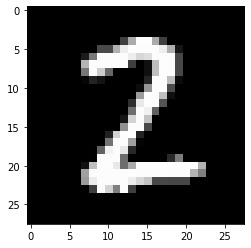

In [18]:
img = train_x.iloc[22].values.reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

## Data Manipulation

There really isn't much to do here except to normalize our data. Since our datset has an alpha between (0,255) we normalize it my dividing by 255 resulting in the alpha to be between (0,1).

In [19]:
train_x = train_x/255
test = test/255

## The Model

We will first generate random seeds for our model.

Then we will create our model, our model will have an input layer and 2 hidden layers before reaching its output layer.

The input layer will have a shape of 784 since that is the shape of the columns of our dataset.

The hidden layers will have units half the size of the previous layer.

Finally the output layer will have 10 units since we are classifying numbers between 0-9.

Our model will compile with addaptive moment estimation optimizer.

After creating our model we will fit it on our train data with 5 epochs and 256 batch size. Which would be 42000/256 = 164 iterations.

In [20]:
np.random.seed(1234)
tf.random.set_seed(1234)

nn = tf.keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=(784,), name='input_layer'),
    layers.Dense(units=256, activation='relu', name='hidden1'),
    layers.Dense(units=128, activation='relu', name='hidden2'),
    layers.Dense(units=10, activation='softmax', name='output_layer')
], name='nn')

nn.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

In [21]:
nn.fit(x=train_x,y=train_y,epochs=5,batch_size=256)

Epoch 1/5
165/165 [==============================] - 3s 19ms/step - loss: 0.3320 - accuracy: 0.9040
Epoch 2/5
165/165 [==============================] - 3s 21ms/step - loss: 0.1178 - accuracy: 0.9645
Epoch 3/5
165/165 [==============================] - 4s 22ms/step - loss: 0.0709 - accuracy: 0.9778
Epoch 4/5
165/165 [==============================] - 3s 21ms/step - loss: 0.0560 - accuracy: 0.9824
Epoch 5/5
165/165 [==============================] - 4s 23ms/step - loss: 0.0371 - accuracy: 0.9885


## Results of Neural Network

As you can see the model work extremely well on our training dataset. 

We will now create predictions on our test datset. Out test datset did not come with labels, so I will be presenting the image and the prediction for that corresponding image for a few test images to validate everything is working. 

In [22]:
predictions = nn.predict(test)

In [23]:
print(predictions)

[[3.8476724e-09 2.2453837e-10 9.9999976e-01 ... 2.5908460e-07
  1.5772415e-10 2.7430311e-11]
 [9.9998999e-01 1.4264824e-06 7.1589143e-06 ... 5.5201355e-07
  1.6512219e-08 1.4963663e-07]
 [2.7468812e-05 9.6534233e-05 7.2159448e-05 ... 8.8534161e-04
  1.2589531e-03 9.9058437e-01]
 ...
 [6.7868081e-12 2.5196689e-10 1.2135444e-08 ... 1.3912890e-10
  2.1828201e-08 7.2305761e-07]
 [1.8249785e-06 7.3340296e-08 2.5453096e-07 ... 7.1334543e-05
  2.8511104e-06 9.9798238e-01]
 [1.2381925e-09 2.0704445e-09 9.9999988e-01 ... 1.5009510e-08
  2.8819042e-10 2.5466790e-10]]


In [24]:
predictions.shape

(28000, 10)

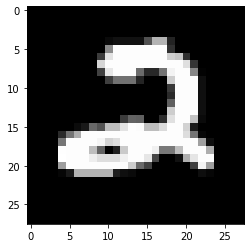


Our Prediction for this picture is: 2


In [25]:
img = test.iloc[0].values.reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()
print()
print(f"Our Prediction for this picture is: {np.argmax(predictions[0])}")

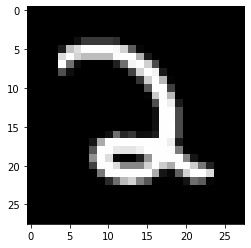


Our Prediction for this picture is: 2


In [26]:
img = test.iloc[122].values.reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()
print()
print(f"Our Prediction for this picture is: {np.argmax(predictions[122])}")

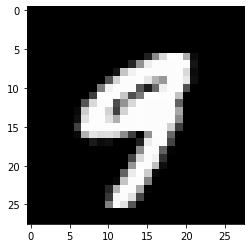


Our Prediction for this picture is: 9


In [27]:
img = test.iloc[547].values.reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()
print()
print(f"Our Prediction for this picture is: {np.argmax(predictions[547])}")

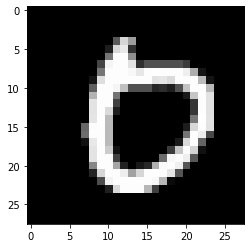


Our Prediction for this picture is: 0


In [28]:
img = test.iloc[1000].values.reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()
print()
print(f"Our Prediction for this picture is: {np.argmax(predictions[1000])}")